In [147]:
import pandas as pd                                    # for reading csv file
import matplotlib.pyplot as plt                        # for data visualization
import seaborn as sns                                  # for data visualization
import numpy as np
from sklearn import datasets

In [148]:
df = datasets.load_iris()
df.feature_names # column header
df.data # independent variables
df.target # dependent variables
print(df.DESCR) # dataset description 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [149]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [150]:
X = df.data
y = df.target

In [151]:
X.shape

(150, 4)

In [152]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [153]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.73055142 0.22675973]


In [137]:
sum(explained_variance)

0.957311148833847

In [138]:
X_train1

array([[ 3.30180845,  0.01731959],
       [ 1.90723199,  0.65878151],
       [-1.98631341,  0.17288663],
       [-1.90277699,  0.3990639 ],
       [ 0.05761623, -1.0649465 ],
       [-1.77366979, -2.35706075],
       [ 0.76702599,  0.72324419],
       [-2.55564946,  1.69014252],
       [ 1.2562083 ,  0.58183073],
       [ 0.76130113,  0.34851745],
       [ 1.00647482, -0.60212855],
       [ 1.99866713,  1.00643181],
       [ 1.25982658, -1.61844052],
       [ 2.24914569,  1.86783967],
       [ 0.07439641, -1.58706657],
       [ 0.69503829, -0.25904347],
       [ 0.75376509,  0.55065686],
       [-2.14521408,  1.7687172 ],
       [-2.16849594,  0.91597414],
       [ 0.74861291, -0.219121  ],
       [-1.85268404,  0.34253052],
       [ 1.36111434,  0.3834048 ],
       [-2.19263389, -0.40111778],
       [-2.22402447, -0.65667031],
       [ 0.41235474, -1.584977  ],
       [-0.39022793, -1.56588832],
       [ 2.01892899,  0.58076761],
       [-2.45892554,  0.51084358],
       [ 1.85807442,

In [139]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train1, y_train)
y_pred = classifier.predict(X_test1)

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)
print("class report:")
print(classification_report(y_test,y_pred))
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

[[11  0  0]
 [ 0 13  2]
 [ 0  0 12]]
class report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38

Accuracy: 0.9473684210526315


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


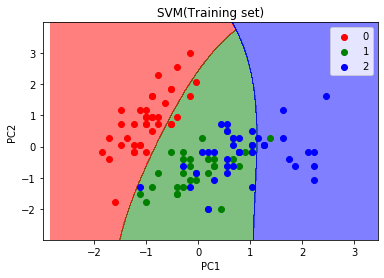

In [141]:
from matplotlib.colors import ListedColormap

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                            stop=X_set[:,0].max()+1,
                            step=0.01),
                  np.arange(start=X_set[:,1].min()-1,
                            stop=X_set[:,1].max()+1,
                            step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,
             cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X1.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(("red","green","blue"))(i),label=j)
plt.title('SVM(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [142]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [143]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train1 = pca.fit_transform(X_train)
# X_test1 = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

In [144]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.1,C=1)
classifier.fit(X_train1, y_train)
y_pred_train = classifier.predict(X_train1)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report

cfm = confusion_matrix(y_train,y_pred_train)
print(cfm)
print("class report:")
print(classification_report(y_train,y_pred_train))
acc = accuracy_score(y_train,y_pred_train)
print("Accuracy:",acc)

[[39  0  0]
 [ 0 32  3]
 [ 0  5 33]]
class report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.86      0.91      0.89        35
           2       0.92      0.87      0.89        38

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112

Accuracy: 0.9285714285714286


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


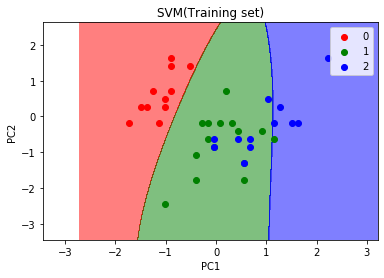

In [146]:
from matplotlib.colors import ListedColormap

X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                            stop=X_set[:,0].max()+1,
                            step=0.01),
                  np.arange(start=X_set[:,1].min()-1,
                            stop=X_set[:,1].max()+1,
                            step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),
                                                X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,
             cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X1.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(("red","green","blue"))(i),label=j)
plt.title('SVM(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()